In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import re
import os
import shutil

In [2]:
trainingLog='LogFile/training_log1.log'
testingLog='LogFile/testing_log1.log'
validationLog='LogFile/validation_log1.log'

In [3]:
txtname=[trainingLog,testingLog,validationLog]
for i in range(3):
    if os.path.exists(txtname[i]):
        shutil.copy(txtname[i],txtname[i].split('.')[0]+'.txt')

In [4]:
trainingTxt=trainingLog.split('.')[0]+'.txt'
trainingAccuracy=[]
trainingLoss=[]
with open(trainingTxt,'r') as f:
    for line in f:
        tmp=line.split('   ')
        #print tmp
        trainingAccuracy.append(float(tmp[2].split(':')[1]))
        trainingLoss.append(float(tmp[3].split(':')[1]))

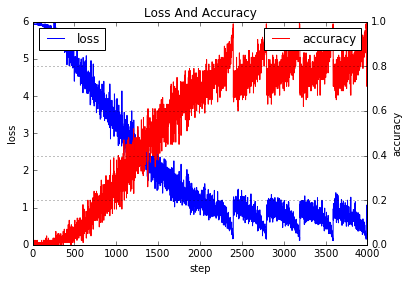

In [5]:
#coding=utf-8
fig = plt.figure()
ax1 = fig.add_subplot(111)
steps=range(len(trainingAccuracy))

ax1.plot(steps,trainingLoss,'b',label='loss')
ax1.set_xlabel('step')
ax1.set_ylabel('loss')
ax1.legend(loc=2)
ax2 = ax1.twinx() 
ax2.plot(steps,trainingAccuracy,'r',label='accuracy')
ax2.set_xlabel('step')
ax2.set_ylabel('accuracy')
ax2.legend(loc=1)

plt.title('Loss And Accuracy')
plt.grid()
plt.show()

In [6]:
validationTxt=validationLog.split('.')[0]+'.txt'
validationAccuracy=[]
with open(validationTxt,'r') as f:
    for line in f:
        tmp=line.split('   ')
        #print tmp
        validationAccuracy.append(float(tmp[2].split(':')[1]))

In [7]:
validationAccuracy_len=len(validationAccuracy)
validationErro=1-np.array(validationAccuracy)[:-1]
trainingError=(1-np.array(trainingAccuracy))
step_new=np.arange(0,4000,100)
trainingError_new=[trainingError[i] for i in np.arange(0,4000,100) if i%100==0]

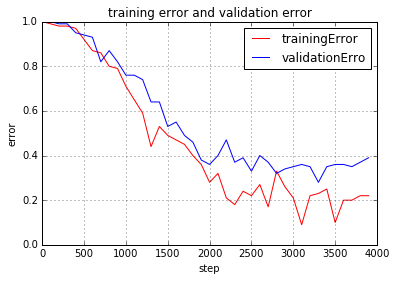

In [8]:
plt.title('training error and validation error')
plt.plot(step_new,trainingError_new,'r')
plt.plot(step_new,validationErro,'b')
plt.xlabel('step')
plt.ylabel('error')
plt.legend(('trainingError','validationErro'))
plt.grid()
plt.show()

In [37]:
validationAccuracy_len
validationErro

array([ 1.  ,  1.  ,  0.99,  0.99,  0.95,  0.94,  0.93,  0.82,  0.87,
        0.82,  0.76,  0.76,  0.74,  0.64,  0.64,  0.53,  0.55,  0.49,
        0.46,  0.38,  0.36,  0.4 ,  0.47,  0.37,  0.39,  0.33,  0.4 ,
        0.37,  0.32,  0.34,  0.35,  0.36,  0.35,  0.28,  0.35,  0.36,
        0.36,  0.35,  0.37,  0.39])

In [38]:
step_new=np.arange(0,4000,100)

[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900
 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900] 40 4000


In [39]:
trainingError_new=[trainingError[i] for i in np.arange(0,4000,100) if i%100==0]